In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [4]:
# 리뷰 출력시 ... 없이 전부 나오게 설정
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [7]:
data_kurly = pd.read_excel(r"C:\Users\NT550-048\Desktop\잇더\data\kurly_label.xlsx", index_col=0)

키워드 정제 후 빈도 분석

In [4]:
#키워드 정제 파일 위치 설정 후 불러오기
data_dir = 'C:/Users/NT550-048/Desktop/잇더/마켓컬리_키워드검수'
data_list = os.listdir(data_dir)

파일별 빈도 추출 함수
- n : 파일 인덱스

In [5]:
def table_view(n):
    df = pd.read_excel(data_dir+'/'+data_list[n], index_col=0).dropna()
    print(data_list[n])
    print(df)

In [6]:
table_view(0)

구운 삼치 솥밥키트 긍정_빈도수.xlsx
     Top Nouns  빈도수  Correlation
3      솥밥/Noun   33     0.751284
7      삼치/Noun   23     0.405716
22      때/Noun   11     0.114533
28      끼/Noun   10     0.398689
31      밥/Noun   10     0.207152
46     가격/Noun    8     0.294093
45     아기/Noun    8     0.262293
50     간장/Noun    7     0.155383
57     하루/Noun    6     0.160328
60     주문/Noun    6     0.165511
61     간이/Noun    6     0.278015
59     아이/Noun    6     0.288133
67     비리/Noun    6     0.309501
70     냄새/Noun    5     0.175734
85    토마토/Noun    5     0.169788
74      양/Noun    5     0.140398
89      간/Noun    5     0.129560
77     준비/Noun    5     0.187507
71     재료/Noun    5     0.216386
115    해먹/Noun    4     0.124933
95     오늘/Noun    4     0.157491
122     집/Noun    4     0.155199
100    남편/Noun    4     0.087311
154    제품/Noun    3     0.215687
135    입맛/Noun    3     0.198152
164     쌀/Noun    3     0.115129
159   둘이서/Noun    3     0.119150
174    미림/Noun    3     0.125274
143    요리/Noun    3 

제품별 키워드 포함된 리뷰 추출 함수

In [5]:
def kw_in_product(product_name, keyword):
    return data_kurly[(data_kurly['ProductName'] == product_name)&(data_kurly['ReviewText'].apply(lambda x:keyword in x))]['ReviewText']

In [68]:
kw_in_product('[온하루] 한돈 건나물 솥밥키트', '때')

12112                                                                                                                                                                                                                                                                                                           1인가구라서 키트로 구매해서 두끼 해결했어요. 코로나감염되서 고생할때 나름 든든하게 먹을수있었어요. 재구매의사있어요
12129                                                                                                                                                                                                     전기밥솥에 백미취사로 레시피 대로 해서 먹었네요 저는 좀 밥이 꼬들하게 됐어요 나물밥이니 진거보단 낫다 하고 먹었네요  고기 냄새난단 후기를 본거같은데 저도 고기냄새 민감한편인데 잘 모르겠드라고요 고추지 양념장을 좀더 주시면 더 맛있게 비빌때도 좀 촉촉하게 비벼먹을수 있을것 같단 생각이 들었어요 
12148                                                                                                                                                                                                                                                                 

전체 리뷰에서 키워드 포함 리뷰 추출 함수

In [5]:
def kw_in_review(kw):
    print('"', kw, '"', '포함된 리뷰 총',len(data_kurly[data_kurly['ReviewText'].apply(lambda x:kw in x)]['ReviewText']),'건')
    return data_kurly[data_kurly['ReviewText'].apply(lambda x:kw in x)]['ReviewText']

In [9]:
kw_in_review('노른자')

" 노른자 " 포함된 리뷰 총 9 건


6793                                                                                                                                                                       솥밥 키트 자주시켜먹는데, 제 최애는 가지 솥밥이었는데 어느날부터 없어졌더라구요. 다시 새로 나와서 좋아요!!  가지하고 고기가 큼지막하게 있어서 씹기도 좋고, 재료들 맛도 잘 느껴져요. 가지는 익으면서 엄청 부드러워지구요. 가지 안좋아하는 사람이나 아이들도 맛있게 먹을 수 있는 정도입니다!  전에는 간이 조금 쎘던 것 같은데, 이번에는 간이 쎄지않아서 한그릇 질리지않게 먹을 수 있는 것 같아요. 그리고 비주얼이 일단 덮밥처럼 넘 좋습니다!  계란 노른자 올려먹으면 더 고소하고 부드러워져서 더 맛있어용
6875                                                                                                                                                                                                                                                                                                                                                                                                                                      맛있어요!  노른자 꼭 올려먹으세요 너무 맛잇어요 
6897                                                                                      

# 리뷰 라벨링 작업

장소 라벨링 함수


In [49]:
def location_label(sen):
    if '캠핑' in sen:
        label = 1
    elif '여행' in sen:
        label = 2
    elif '병원' in sen:
        label = 3
    elif '집' in sen:
        label = 4
    else:
        label = 5
    return label

In [51]:
data_kurly['location_label'] = data_kurly['ReviewText'].apply(lambda x:location_label(x))

장소 빈도분석 및 시각화

In [14]:
data_kurly['location_label'].value_counts()

location_label
5    12023
4      384
1       20
2        7
3        2
Name: count, dtype: int64

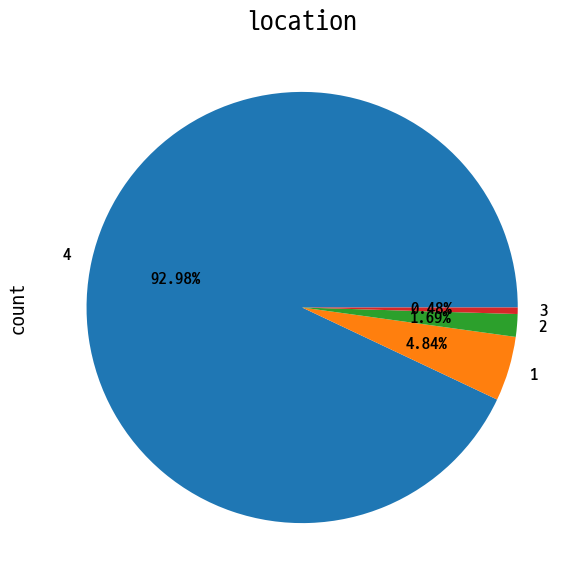

In [15]:
plt.figure(figsize=(7,7))
plt.title('location' , fontsize=20)
plt.ylabel('location_labeling' , fontsize=15)
data_kurly[data_kurly['location_label']!=5]['location_label'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})
plt.show()

상황 라벨링 함수

In [64]:
def purpose_labeling(sen):
    gift = ['선물','보내','보냈'] # 1
    invite = ['집들이', '초대', '접대', '파티', '해드', '파티', '크리스마스', '대접', '생일', '생신', '손님','모실때', '모시', '어르신', '어루신'] # 2
    goodmeal = ['보신', '분위기', '고급', '건강', '보양', '도전', '기운', '기분','제대로','성공'] # 3
    comfortable = ['귀찮','편하','급하','간단','밥하기','입맛없','입맛 없','밥맛없','밥맛 없','반찬없','반찬 없','바쁜','바쁠','바쁘'] # 4
    label = 0
    for kw in goodmeal:
        if kw in sen:
            label = 3
            break
    for kw in comfortable:
        if kw in sen:
            if label == 3:
                label = 5
            else:
                label = 4
            break
    for kw in invite:
        if kw in sen:
            label = 2
            break
    for kw in gift:
        if kw in sen:
            label = 1
            break
    return label

In [65]:
data_kurly['purpose_label'] = data_kurly['ReviewText'].apply(lambda x:purpose_labeling(x))

상황 빈도분석 및 시각화

In [8]:
data_kurly['purpose_label'].value_counts()

purpose_label
0    9754
4    1732
3     495
2     233
5     132
1      90
Name: count, dtype: int64

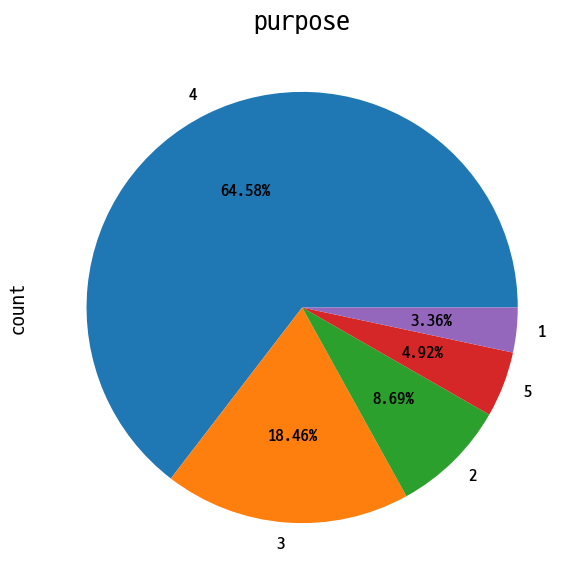

In [13]:
plt.figure(figsize=(7,7))
plt.title('purpose' , fontsize=20)
plt.ylabel('purpose_labeling' , fontsize=15)
data_kurly[data_kurly['purpose_label']!=0]['purpose_label'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})
plt.show()

구성원 라벨링 함수

In [14]:
def person_labeling(x):
    who_guest = ['지인','손님','직장','친구','남친', '남자', '여자'] #1 외부인
    who_mam = ['엄마','어머니', '아빠','아버지','아부지', '할아버지', '할머니', '부모','엄빠'] # 2 어른
    who_kid = ['딸','아들','아이','애들','얘들', '아기','애기'] # 3 아이
    who_husband = ['남편','오빠', '남의편','아저씨', '부부', '와이프', '주부', '신랑'] # 4 부부
    who_fam = ['식구','가족', '동생', '언니'] # 5 가족
    who_solo = ['혼자', '자취', '1인가구', '저는', '저한', '제가', '제 입'] #6 혼자       7 나 

    if any(i in x for i in who_guest):
        person_label = 1
    elif any(i in x for i in who_mam):
        person_label = 2
    elif any(i in x for i in who_kid):
        person_label = 3
    elif any(i in x for i in who_husband):
        person_label = 4
    elif any(i in x for i in who_fam):
        person_label = 5
    elif any(i in x for i in who_solo):
        person_label = 6
    else:
        person_label = 7
    
    return person_label

In [17]:
data_kurly['person_label'] = data_kurly['ReviewText'].apply(lambda x:person_labeling(x))

구성원 라벨링 빈도분석 및 시각화

In [18]:
data_kurly['person_label'].value_counts()

person_label
7    10837
3      524
6      347
2      197
4      189
5      179
1      163
Name: count, dtype: int64

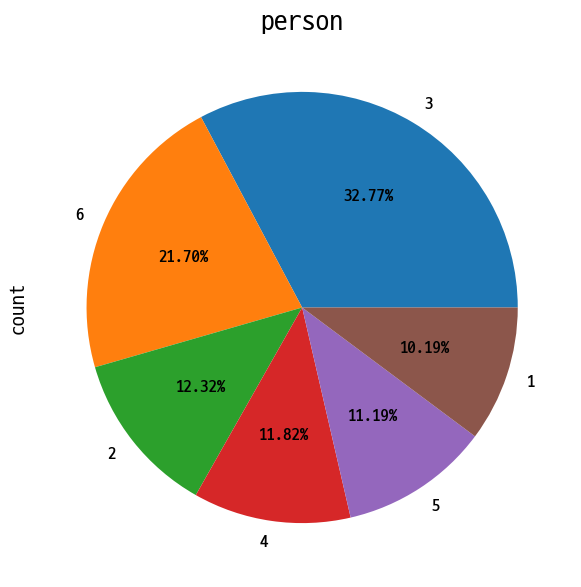

In [12]:
plt.figure(figsize=(7,7))
plt.title('person' , fontsize=20)
plt.ylabel('purson_labeling' , fontsize=15)
data_kurly[data_kurly['person_label']!=7]['person_label'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                         textprops = {'fontsize' : 12 , 
                                                      'weight' : 'bold'})
plt.show()

추가) 키워드 여러개 중 하나 포함한 리뷰 추출 함수

In [33]:
def kw_in_review_listver(kw_list, sen):
    for kw in kw_list:
        #print('"', kw, '"', '포함된 리뷰 총',len(data_kurly[data_kurly['ReviewText'].apply(lambda x:kw in x)]['ReviewText']),'건')
        if kw in sen:
            output = True
            break
        else:
            output = False
    return output

In [39]:
Counter(sum(data_kurly[data_kurly['ReviewText'].apply(lambda x:kw_in_review_listver(['토핑', '추가', '넣','얹'], x))]['token_nouns'].to_list(), [])).most_common()

[('더', 630),
 ('추가', 577),
 ('밥', 481),
 ('전복', 430),
 ('쌀', 338),
 ('솥밥', 316),
 ('맛', 305),
 ('좀', 283),
 ('육수', 277),
 ('거', 264),
 ('미나리', 254),
 ('것', 212),
 ('조금', 191),
 ('간장', 176),
 ('안', 172),
 ('저', 160),
 ('물', 158),
 ('때', 155),
 ('구매', 135),
 ('양', 133),
 ('집', 132),
 ('해', 131),
 ('간이', 124),
 ('소스', 124),
 ('고기', 116),
 ('키트', 114),
 ('버섯', 111),
 ('수', 109),
 ('정도', 107),
 ('게', 101),
 ('양념장', 97),
 ('정말', 96),
 ('두', 96),
 ('도미', 91),
 ('후기', 90),
 ('살짝', 87),
 ('전', 87),
 ('문어', 86),
 ('그냥', 82),
 ('전기밥솥', 81),
 ('개', 80),
 ('컵', 76),
 ('요', 76),
 ('재료', 73),
 ('듯', 73),
 ('진짜', 71),
 ('사서', 71),
 ('끼', 69),
 ('먹기', 68),
 ('또', 68),
 ('다음', 67),
 ('인분', 65),
 ('주문', 64),
 ('양념', 63),
 ('조리', 62),
 ('생각', 61),
 ('표고버섯', 60),
 ('다른', 60),
 ('밥솥', 60),
 ('쪽파', 59),
 ('향', 59),
 ('아주', 58),
 ('소고기', 58),
 ('반', 57),
 ('하나', 55),
 ('아이', 54),
 ('새우', 52),
 ('번', 52),
 ('추천', 51),
 ('약간', 51),
 ('보고', 49),
 ('레시피', 49),
 ('냄비', 49),
 ('컬리', 49),
 ('들기름', 49),
 ('참기름', 48),